In [1]:
import numpy as np

import matplotlib.pyplot as plt

from bingo.AGraph import AGraphManipulator
from bingo.AGraph import AGNodes
from bingo.FitnessPredictor import FPManipulator
from bingo.FitnessMetric import StandardRegression
from bingo.TrainingData import ExplicitTrainingData
from bingo.Island import Island

import logging
logging.basicConfig(level=logging.DEBUG, format='%(message)s')

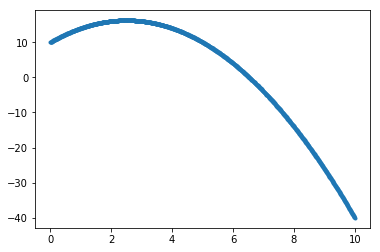

In [2]:
data_x = np.linspace(0,10,1000)
data_y = 10 - (data_x - 5)*data_x
plt.plot(data_x, data_y, '.')

In [3]:
training_data = ExplicitTrainingData(data_x.reshape((-1,1)), data_y.reshape((-1, 1)))

In [4]:
error_metric = StandardRegression()

In [5]:
def fitness(indv):
    return error_metric.evaluate_fitness(indv, training_data)
# fitness = | f(x) - y |
# f(x) equ.evaluate(training_data.x)
# y = traing_data.y


In [6]:
sol_manip = AGraphManipulator(1, 32, nloads=1)
sol_manip.add_node_type(AGNodes.Add)
sol_manip.add_node_type(AGNodes.Subtract)
sol_manip.add_node_type(AGNodes.Multiply)

In [7]:
random_equ = sol_manip.generate()
print(fitness(random_equ))
print(random_equ.latexstring())

15416.281817413354
((x_0)(x_0) + x_0 - ((x_0)(x_0)) - (x_0 + x_0) + x_0 - (x_0 + x_0 - ((x_0)(x_0)) + x_0 + x_0))((x_0)((x_0)(x_0)) - ((x_0 + x_0 - ((x_0)(x_0)))(x_0)))


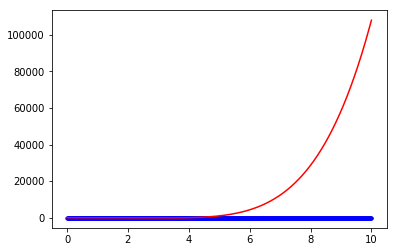

In [8]:
equ_x = training_data.x
equ_y = random_equ.evaluate(equ_x)
plt.plot(data_x, data_y, 'b.')
plt.plot(equ_x, equ_y, 'r-')

In [9]:
i = Island(sol_manip, fitness)
i.deterministic_crowding_step()

In [10]:
best_equ = i.best_indv()
print(i.best_indv().fitness, i.best_indv().latexstring())

6.42784005224213 x_0 + 26.6500 - ((x_0 - (x_0 + x_0))(-6.0000))


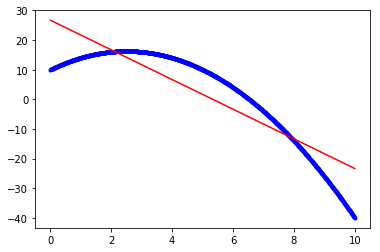

In [11]:
equ_x = training_data.x
equ_y = best_equ.evaluate(equ_x)
plt.plot(data_x, data_y, 'b.')
plt.plot(equ_x, equ_y, 'r-')

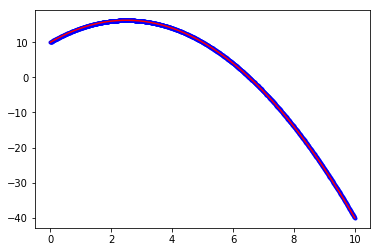

In [12]:
for _ in range(100):
    i.deterministic_crowding_step()

best_equ = i.best_indv()

equ_x = training_data.x
equ_y = best_equ.evaluate(equ_x)
plt.plot(data_x, data_y, 'b.')
plt.plot(equ_x, equ_y, 'r-')

In [13]:
print(best_equ.latexstring())

((8.0623 + x_0 + -6.5311)(0.3596))((x_0 + -6.5311)(-2.7810))


In [14]:
from bingo.CoevolutionIsland import CoevolutionIsland

In [15]:
import time

In [16]:
t0 = time.time()
for _ in range(100):
    i.deterministic_crowding_step()
t1 = time.time()
print("100 island steps took:", t1-t0)

100 island steps took: 2.0903103351593018


In [17]:
pred_manip = FPManipulator(10, 100)

In [18]:
ci = CoevolutionIsland(training_data, sol_manip, pred_manip, error_metric, verbose=False)

In [19]:
t0 = time.time()
for _ in range(100):
    ci.generational_step()
t1 = time.time()
print("100 island steps took:", t1-t0)

100 island steps took: 2.7574143409729004


[16, 99, 98, 77, 77, 80, 44, 79, 61, 48]


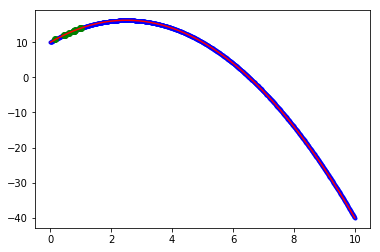

In [20]:
best_predictor = ci.predictor_island.best_indv()
best_equ = ci.solution_island.best_indv()
print(best_predictor.indices)

equ_x = training_data.x
equ_y = best_equ.evaluate(equ_x)
plt.plot(data_x, data_y, 'b.')
plt.plot(data_x[best_predictor.indices], data_y[best_predictor.indices], 'go')
plt.plot(equ_x, equ_y, 'r-')